In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import openrtdynamics2.lang as dy
import openrtdynamics2.py_execute as dyexe
import openrtdynamics2.targets as tg

In [2]:
dy.clear()

system = dy.enter_system()

# define system inputs
input1               = dy.system_input( dy.DataTypeFloat64(1), name='input1', default_value=2.0,  value_range=[0, 25], title="input #1")

# the diagram
output = input1 * dy.counter()
output2 = dy.counter()

# define output(s)
dy.append_output(output, 'output')
dy.append_output(output2, 'output2')

# generate code
code_gen_results = dy.generate_code(template=tg.TargetCppMinimal())


compiling system simulation (level 0)... 


In [3]:
compiled_system = dyexe.CompiledCode(code_gen_results)
testsim = dyexe.SystemInstance(compiled_system)

In [4]:
sim_results = dyexe.run_batch_simulation(testsim, input_data={}, N=10,  output_keys=['output', 'output2'] )
sim_results['output']

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

In [5]:
sim_results['output2']

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [6]:
assert(sim_results['output'][0] == 0)
assert(sim_results['output'][1] == 2)
assert(sim_results['output'][2] == 4)
assert(sim_results['output'][3] == 6)

In [7]:
assert(sim_results['output2'][0] == 0)
assert(sim_results['output2'][1] == 1)
assert(sim_results['output2'][2] == 2)
assert(sim_results['output2'][3] == 3)

# Advanced counter

In [8]:
dy.clear()

system = dy.enter_system()

# the diagram
s1, trigger1 = dy.counter_triggered( upper_limit=dy.int32(15), reset_on_limit=False, initial_state=0 )
s2, trigger2 = dy.counter_triggered( upper_limit=dy.int32(10), reset_on_limit=True, initial_state=0 )
s3, trigger3 = dy.counter_triggered( upper_limit=dy.int32(10), reset_on_limit=True, initial_state=5 )


# define output(s)
dy.append_output(s1, 'signal1')
dy.append_output(s2, 'signal2')
dy.append_output(s3, 'signal3')

dy.append_output(trigger1, 'trigger1')
dy.append_output(trigger2, 'trigger2')
dy.append_output(trigger3, 'trigger3')


# generate code
code_gen_results = dy.generate_code(template=tg.TargetCppMinimal())


compiling system simulation (level 0)... 


In [9]:
compiled_system = dyexe.CompiledCode(code_gen_results)
sim_results = dyexe.run_batch_simulation(dyexe.SystemInstance(compiled_system), input_data={}, N=30)

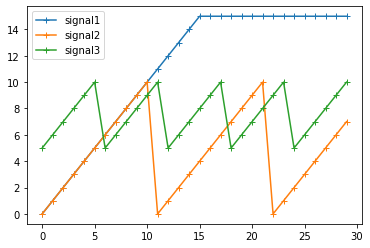

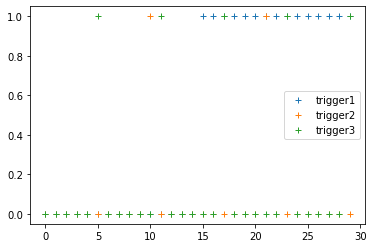

In [10]:
plt.figure()
plt.plot( sim_results['signal1'], '+-' )
plt.plot( sim_results['signal2'], '+-' )
plt.plot( sim_results['signal3'], '+-' )
plt.legend(['signal1', 'signal2', 'signal3'])
plt.show()

plt.figure()
plt.plot( sim_results['trigger1'], '+' )
plt.plot( sim_results['trigger2'], '+' )
plt.plot( sim_results['trigger3'], '+' )
plt.legend(['trigger1', 'trigger2', 'trigger3'])
plt.show()

In [11]:
# NBVAL_CHECK_OUTPUT
sim_results['signal1']

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15.])

In [12]:
# NBVAL_CHECK_OUTPUT
sim_results['signal2']

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,  0.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,  0.,  1.,  2.,  3.,
        4.,  5.,  6.,  7.])

In [13]:
# NBVAL_CHECK_OUTPUT
sim_results['signal3']

array([ 5.,  6.,  7.,  8.,  9., 10.,  5.,  6.,  7.,  8.,  9., 10.,  5.,
        6.,  7.,  8.,  9., 10.,  5.,  6.,  7.,  8.,  9., 10.,  5.,  6.,
        7.,  8.,  9., 10.])

In [14]:
# NBVAL_CHECK_OUTPUT
sim_results['trigger1']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
# NBVAL_CHECK_OUTPUT
sim_results['trigger2']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
# NBVAL_CHECK_OUTPUT
sim_results['trigger3']

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.])